# Ottimizzazione delle prestazioni di una rete neurale per il settore food

GourmetAI Inc., una rinomata azienda nel settore della tecnologia alimentare, si trova ad affrontare sfide crescenti nel migliorare l'accuratezza e l'efficienza dei sistemi di classificazione delle immagini di cibo. La necessità di fornire ai clienti soluzioni avanzate e di alta qualità per identificare e categorizzare correttamente i cibi è essenziale per migliorare l'esperienza utente e ottimizzare i processi aziendali.

**Benefici del Progetto:** L'implementazione di tecniche avanzate di deep learning per la classificazione delle immagini di cibo offre numerosi vantaggi: **Miglioramento dell'Esperienza Utente**: Un sistema preciso e affidabile migliora significativamente l'esperienza degli utenti nelle applicazioni di riconoscimento di immagini di cibo, fornendo risultati rapidi e accurati.

**Ottimizzazione dei Processi Aziendali**: Automatizzare la classificazione delle immagini riduce il tempo e le risorse necessarie per identificare e categorizzare i cibi, migliorando l'efficienza operativa complessiva.

**Innovazione Tecnologica**: Utilizzare tecniche avanzate di deep learning promuove l'innovazione all'interno dell'azienda, consentendo di affrontare sfide complesse nel settore del riconoscimento delle immagini.

**Obiettivi di Business**: Migliorare le performance dei modelli di classificazione aiuta GourmetAI Inc. a soddisfare gli obiettivi di business, consolidando la propria posizione come leader nel settore della tecnologia alimentare.

**Dettagli del Progetto:** GourmetAI Inc. ha richiesto lo sviluppo di un modello avanzato di classificazione di immagini di cibo utilizzando tecniche di deep learning. Il progetto si baserà sul dataset Food Classification, arricchito con tecniche di augmentation per migliorare la diversità e la qualità dei dati disponibili.

**Obiettivi del Progetto:**

1. **Strategie di Augmentation**: Implementare diverse tecniche di augmentation per arricchire il dataset, migliorando la variabilità e la qualità dei dati.

2. **Divisione del Dataset**: Suddividere il dataset in trainset, valset e testset per garantire un'adeguata formazione e validazione del modello.

3. **Architetture di Rete e Transfer Learning**: Selezionare e implementare una o più architetture di rete neurale adatte al problema, utilizzando il transfer learning per sfruttare modelli pre-addestrati.

4. **Fine Tuning e Scelta degli Hyperparameters**: Creare un classificatore personalizzato, scegliere gli hyperparameters e ottimizzare il modello attraverso processi di training e validation.

5. **Validation e Regolarizzazione**: Utilizzare tecniche di validation per migliorare la scelta degli hyperparameters e risolvere potenziali problemi con tecniche di regolarizzazione.

6. **Test Finale**: Eseguire un test finale per verificare le capacità di generalizzazione del modello e raggiungere le performance desiderate.

**Fasi del Progetto:**

**Sviluppo delle Strategie di Augmentation**: Esplorazione e implementazione di tecniche di augmentation per arricchire il dataset.

**Preparazione del Dataset**: Divisione del dataset in trainset, valset e testset; preparazione degli strumenti per l'utilizzo delle immagini come input.

**Selezione e Implementazione delle Architetture**: Scelta e implementazione di architetture di rete neurale, applicando il transfer learning.

**Fine Tuning e Scelta degli Hyperparameters**: Creazione di un classificatore personalizzato, selezione degli hyperparameters e ottimizzazione del modello.

**Validation e Regolarizzazione**: Ripetizione del training con tecniche di validation e regolarizzazione per migliorare le performance del modello.

**Test Finale**: Esecuzione di un test finale per valutare le capacità di generalizzazione del modello e confrontare i risultati con le aspettative.

**Motivazione del Progetto:** Per GourmetAI Inc., la precisione nella classificazione delle immagini di cibo rappresenta un requisito fondamentale. Migliorare l'efficacia dei sistemi di classificazione non solo migliora l'esperienza utente e ottimizza i processi aziendali, ma consente anche di consolidare la leadership nel settore della tecnologia alimentare attraverso l'innovazione tecnologica.

Con questo progetto, GourmetAI Inc. mira a sviluppare e implementare un sistema avanzato di classificazione di immagini di cibo, utilizzando tecniche all'avanguardia di deep learning per raggiungere performance superiori e soddisfare le esigenze specifiche del mercato.

Dataset

Il dataset è disponibile al seguente link: https://proai-datasets.s3.eu-west-3.amazonaws.com/dataset\_food\_classification.zip

**Modalità di consegna: **Link pubblico a notebook di Google Colab


# Imports

In [1]:
!wget -q https://raw.githubusercontent.com/pdimarcodev/AI_Engineering/refs/heads/main/utils/ai_utils.py
from ai_utils import no_warnings
no_warnings()

In [2]:
!pip install torchsummary -q

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchsummary import summary

import matplotlib.pyplot as plt
import numpy as np
import os
import random

from sklearn.metrics import confusion_matrix
import seaborn as sns
import json

In [4]:
ROOT = '/content/drive'
DATASETS = ROOT + "/My Drive/datasets"
FOOD_DATA = DATASETS + "/food_data"
MODELS = ROOT + "/My Drive/Colab_Models"

In [5]:
do_train = False

In [6]:
from google.colab import drive
drive.mount(ROOT)

Mounted at /content/drive


# Load dataset

In [7]:
!wget -q https://proai-datasets.s3.eu-west-3.amazonaws.com/dataset_food_classification.zip

In [8]:
!unzip dataset_food_classification.zip -d $DATASETS

In [9]:
!mkdir $FOOD_DATA
!mv $DATASETS/dataset $DATASETS/food_data

In [10]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [11]:
torch.cuda.is_available()

True

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Data augmentation  
Let's add some augmentation to the train data to get a better training phase.
We are adding geometric and color augmentations; once passed ToTensor,
we normalize using ImageNet's mean and std values, because we'll
be using later a pre-trained model (EfficienNet) that was trained with that dataset.  
The input size is (224,224) so in this way we are taking advantage at the same time of a slight Random Resized crop to make the model more robust instead of just cropping.

The randon erasing is added later because is applied on the tensor directly.  
For val and test we don't apply data augmentation. <br> The approach to get the necessary input size is to resize to 256 and then do a center crop to get a centered, not distorted image.



In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),

        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),

        transforms.RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3), value='random')
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Image folders

In [15]:
image_datasets = {
    'train': datasets.ImageFolder(FOOD_DATA+'/dataset/train', data_transforms['train']),
    'val': datasets.ImageFolder(FOOD_DATA+'/dataset/val', data_transforms['val']),
    'test': datasets.ImageFolder(FOOD_DATA+'/dataset/test', data_transforms['test'])
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
classes = image_datasets['train'].classes

In [16]:
print(f"Class names: {classes}")
print(f"Training data size: {dataset_sizes['train']}")
print(f"Testing data size: {dataset_sizes['test']}")

Class names: ['Baked Potato', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Sandwich', 'Taco', 'Taquito', 'apple_pie', 'cheesecake', 'chicken_curry', 'ice_cream', 'omelette', 'sushi']
Training data size: 8960
Testing data size: 2800


In [17]:
len(classes)

14

We have 14 classes in the food dataset.   
The following is a function to convert an image from tensor to be visualizable.

In [19]:
def back_to_image(tensor_img):
    img = tensor_img.clone().cpu().numpy()
    img = np.transpose(img, (1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

In [20]:
num_row = 2
num_col = 5
random_sample = random.sample(range(len(image_datasets['train'])), num_row*num_col)
fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_row,2*num_col))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(back_to_image(image_datasets['train'][random_sample[i]][0]))
    ax.set_title('{}'.format(classes[int(image_datasets['train'][random_sample[i]][1])]))
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Dataloaders

In [21]:
batch_size = 128

num_cpu_cores = os.cpu_count()
print(f"Number of available CPU cores: {num_cpu_cores}")

dataloaders = {
    'train': DataLoader(
        image_datasets['train'],
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_cpu_cores,
        pin_memory=True
    ),
    'val': DataLoader(
        image_datasets['val'],
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_cpu_cores,
        pin_memory=True
    ),
    'test': DataLoader(
        image_datasets['test'],
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_cpu_cores,
        pin_memory=True
    )
}

Number of available CPU cores: 8


# Training and Testing functions

In [23]:
class EarlyStopping:
    def __init__(self, save_path, patience=5, min_delta=0):

        self.save_path = save_path
        self.patience = patience
        self.min_delta = min_delta
        self.min_val_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, validation_loss, model):

        if self.min_val_loss is None:     #First epoch
          self.min_val_loss = validation_loss
          self.save_checkpoint(model)

        elif (self.min_val_loss - validation_loss) > self.min_delta: #Epoch with improvements
          self.min_val_loss = validation_loss
          self.save_checkpoint(model)
          self.counter = 0


        else:     #No improvements
          self.counter +=1
          if self.counter >= self.patience:
            self.early_stop = True

    def save_checkpoint(self, model):
      torch.save(model.state_dict(), self.save_path)

In [24]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    processed_data = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        processed_data += len(inputs)

    return running_loss / processed_data

In [25]:
def test_epoch(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    return running_loss / total, correct / total

In [26]:
def train(model, train_loader, test_loader, criterion, optimizer, device, epochs=100, early_stopping=None, log_path=None):
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = test_epoch(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {test_loss:.4f}, Validation Accuracy: {test_accuracy:.4f}')

        if log_path:
          to_save_json = {
              "train_losses": train_losses,
              "test_losses": test_losses,
              "test_accuracies": test_accuracies
          }
          with open(log_path, 'w') as f:
            json.dump(to_save_json, f)

        if early_stopping is not None:
            early_stopping(test_loss, model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

    return train_losses, test_losses, test_accuracies


In [27]:
def plot_confusion_matrix(model, test_loader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            outputs = model(inputs)

            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')

# Transfer Learning
We'll be using EfficientNet B0 pre-trained model,    freezing it and adding a dropout layer at the end.   
Originally trained with 1000 classes (ImageNet), now we'll do the adjustments to get 14 classes instead.

In [28]:
baseline = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)

for param in baseline.parameters():
    param.requires_grad = False

num_ftrs = baseline.classifier[1].in_features

baseline.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(num_ftrs, len(classes))
)

baseline = baseline.to(device)

print("Model architecture modified for transfer learning:")
print(baseline.classifier)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 181MB/s]


Model architecture modified for transfer learning:
Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=14, bias=True)
)


In [29]:
print(f"--- Model Summary for EfficientNet-B0 (Frozen Backbone) ---")
summary(baseline, input_size=(3, 224, 224))

--- Model Summary for EfficientNet-B0 (Frozen Backbone) ---
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 

In [30]:
baseline_save_folder = MODELS+"/food/baseline/"
os.makedirs(baseline_save_folder, exist_ok = True)
baseline_save_file = os.path.join(baseline_save_folder,"model.pt")
baseline_save_log = os.path.join(baseline_save_folder,"log.json")

For classification we use a cross entropy loss and only the classifier's parameters for the optimizer.

   We set a patience of 5 epochs and a very small minimum delta.

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(baseline.classifier.parameters(), lr=0.001)
early_stopping = EarlyStopping(baseline_save_file, patience=5, min_delta=1e-4)
epochs = 100

In [32]:
if do_train:
    train_losses, test_losses, test_accuracies = train(
        baseline,
        dataloaders['train'],
        dataloaders['val'],
        criterion,
        optimizer,
        device,
        epochs,
        early_stopping,
        log_path=baseline_save_log)

Epoch 1/100, Train Loss: 0.0149, Validation Loss: 0.0104, Validation Accuracy: 0.6987
Epoch 2/100, Train Loss: 0.0100, Validation Loss: 0.0082, Validation Accuracy: 0.7326
Epoch 3/100, Train Loss: 0.0086, Validation Loss: 0.0074, Validation Accuracy: 0.7393
Epoch 4/100, Train Loss: 0.0080, Validation Loss: 0.0070, Validation Accuracy: 0.7424
Epoch 5/100, Train Loss: 0.0076, Validation Loss: 0.0066, Validation Accuracy: 0.7522
Epoch 6/100, Train Loss: 0.0073, Validation Loss: 0.0064, Validation Accuracy: 0.7562
Epoch 7/100, Train Loss: 0.0071, Validation Loss: 0.0063, Validation Accuracy: 0.7540
Epoch 8/100, Train Loss: 0.0069, Validation Loss: 0.0062, Validation Accuracy: 0.7638
Epoch 9/100, Train Loss: 0.0067, Validation Loss: 0.0060, Validation Accuracy: 0.7656
Epoch 10/100, Train Loss: 0.0066, Validation Loss: 0.0059, Validation Accuracy: 0.7737
Epoch 11/100, Train Loss: 0.0065, Validation Loss: 0.0059, Validation Accuracy: 0.7683
Epoch 12/100, Train Loss: 0.0064, Validation Loss: 0

In [33]:
baseline.load_state_dict(torch.load(baseline_save_file))
with open(baseline_save_log, "r") as f:
    baseline_log = json.load(f)

In [34]:
if do_train:
  val_loss, val_accuracy = test_epoch(baseline, dataloaders['val'], criterion, device)
else:
  val_loss = baseline_log['test_losses'][-1]
  val_accuracy = baseline_log['test_accuracies'][-1]
print("Accuracy on val set: ", val_accuracy)

Accuracy on val set:  0.7767857142857143


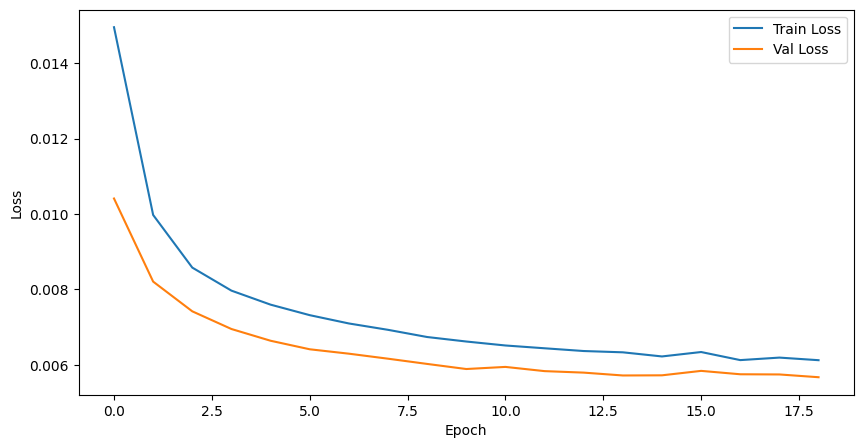

In [35]:
plt.figure(figsize=(10,5))
plt.plot(baseline_log['train_losses'], label='Train Loss')
plt.plot(baseline_log['test_losses'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

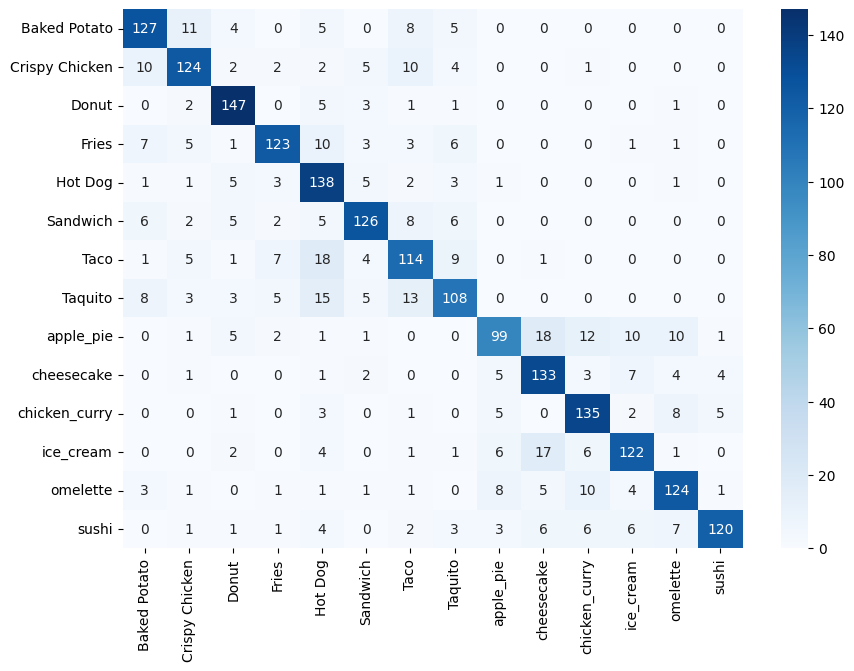

In [36]:
if do_train:
  plot_confusion_matrix(baseline, dataloaders['val'], device)

# Fine-tuning
Now we'll unfreeze some of the layers in the pre-trained model:<br><br>
EfficientNet:
* features: the main convolutional backbone
* avgpool: the pooling layer

Baseline
* classifier: are those layers we added at the end (Dropout and Linear)<br><br>



   

So, this time we must unfreeze parameters inside features,
and in the optimizer use parameters() instead of classifier.parameters() and a lower learning rate.      
We'll continue training the model we've trained previously (baseline)
using a deep copy.

In [45]:
import copy

model_finetune = copy.deepcopy(baseline)

for param in model_finetune.features[-2:].parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model_finetune.parameters(), lr=1e-5)

finetuned_save_file = baseline_save_file.replace('.pt', '_finetuned.pt')
finetuned_save_log = baseline_save_log.replace('.json', '_finetuned.json')

early_stopping= EarlyStopping(finetuned_save_file, patience=5)
epochs = 100

train_losses_ft, test_losses_ft, test_accuracies_ft = train(
    model_finetune,
    dataloaders['train'],
    dataloaders['val'],
    criterion,
    optimizer,
    device,
    epochs,
    early_stopping,
    log_path=finetuned_save_log
)

Epoch 1/100, Train Loss: 0.0061, Validation Loss: 0.0057, Validation Accuracy: 0.7763
Epoch 2/100, Train Loss: 0.0060, Validation Loss: 0.0056, Validation Accuracy: 0.7790
Epoch 3/100, Train Loss: 0.0060, Validation Loss: 0.0056, Validation Accuracy: 0.7808
Epoch 4/100, Train Loss: 0.0059, Validation Loss: 0.0055, Validation Accuracy: 0.7817
Epoch 5/100, Train Loss: 0.0059, Validation Loss: 0.0054, Validation Accuracy: 0.7862
Epoch 6/100, Train Loss: 0.0058, Validation Loss: 0.0054, Validation Accuracy: 0.7844
Epoch 7/100, Train Loss: 0.0056, Validation Loss: 0.0053, Validation Accuracy: 0.7906
Epoch 8/100, Train Loss: 0.0057, Validation Loss: 0.0053, Validation Accuracy: 0.7902
Epoch 9/100, Train Loss: 0.0056, Validation Loss: 0.0053, Validation Accuracy: 0.7911
Epoch 10/100, Train Loss: 0.0055, Validation Loss: 0.0053, Validation Accuracy: 0.7906
Epoch 11/100, Train Loss: 0.0054, Validation Loss: 0.0052, Validation Accuracy: 0.7946
Epoch 12/100, Train Loss: 0.0054, Validation Loss: 0

In [46]:
model_finetune.load_state_dict(torch.load(finetuned_save_file))
with open(finetuned_save_log, "r") as f:
    finetuned_log = json.load(f)

In [47]:
if do_train:
  val_loss, val_accuracy = test_epoch(model_finetune, dataloaders['val'], criterion, device)
else:
  val_loss = finetuned_log['test_losses'][-1]
  val_accuracy = finetuned_log['test_accuracies'][-1]
print("Accuracy on val set: ", val_accuracy)

Accuracy on val set:  0.8330357142857143


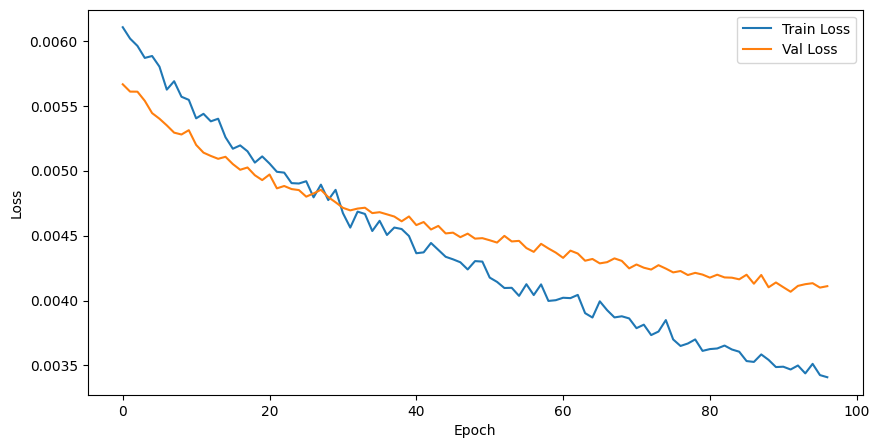

In [48]:
plt.figure(figsize=(10,5))
plt.plot(finetuned_log['train_losses'], label='Train Loss')
plt.plot(finetuned_log['test_losses'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

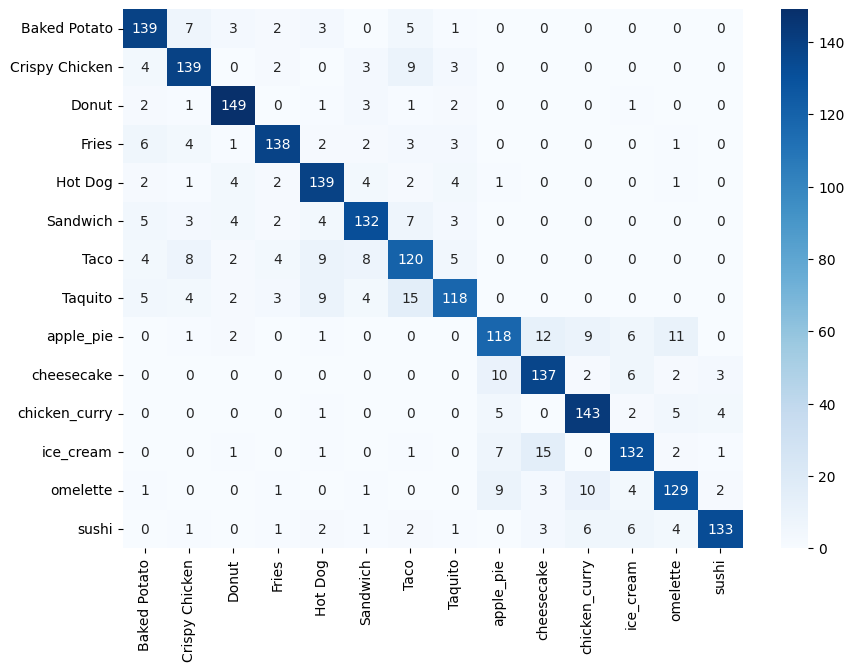

In [49]:
if do_train:
  plot_confusion_matrix(model_finetune, dataloaders['val'], device)

This time we obtained a better accuracy on the val set: 83.3%

# Final test on Test set

 Now with our improved model we're ready to test it on the test set to see how it performs


--- FINAL EVALUATION ON THE TEST SET ---

Final Test Set Performance:
Test Loss: 0.0041
Test Accuracy: 0.8386

Generating confusion matrix for the test set...


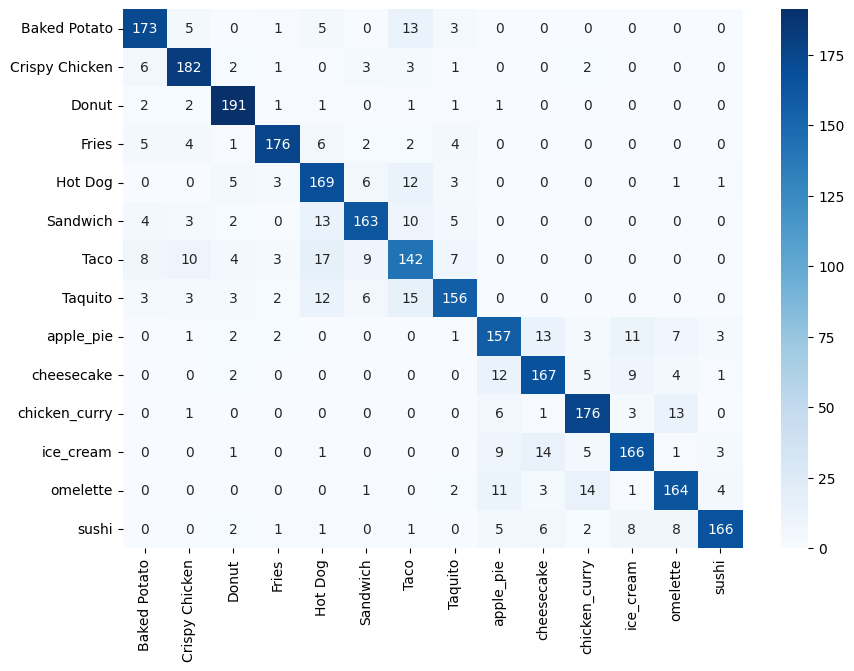


For reference, the best validation accuracy during training was: 0.8330


In [51]:
print("\n--- FINAL EVALUATION ON THE TEST SET ---")
test_loss, test_accuracy = test_epoch(model_finetune, dataloaders['test'], criterion, device)

print(f"\nFinal Test Set Performance:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nGenerating confusion matrix for the test set...")
plot_confusion_matrix(model_finetune, dataloaders['test'], device)
plt.show()

best_val_epoch = np.argmin(finetuned_log['test_losses'])
best_val_acc = finetuned_log['test_accuracies'][best_val_epoch]
print(f"\nFor reference, the best validation accuracy during training was: {best_val_acc:.4f}")

On the Test set the accuracy was even better than on the Val set.   
At this point the fine-tuned model is the best performing.

Pablo Di Marco - 18/06/2025